# Prevission of average occupancy rate - DSA

Our job is to build a Machine Learning model that is able to make predictions about the average occupancy rate of homes in the Boston region, USA, by owners.

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# Load Dataset Boston Houses
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

# Simple Linear Regression with StatsModels

In [2]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

# Create model
model_v1 = sm.OLS(y, X)

# Train Model
model_v1 = model_v1.fit()

print(model_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           2.49e-74
Time:                        18:01:48   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [3]:
print(model_v1.params)

const   -34.670621
RM        9.102109
dtype: float64


In [4]:
# Make previsions
RM = 5
Xp = np.array([1, RM])
print ("if RM = %01.f the average occupancy rate is %0.1f" % (RM, model_v1.predict(Xp)))

if RM = 5 the average occupancy rate is 10.8


## ScatterPlot with Linear Regression

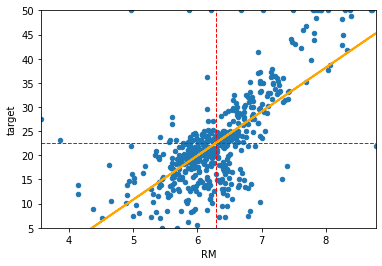

In [5]:
predict_values = model_v1.predict(X)
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)
regression_line = scatter_plot.plot(dataset['RM'], predict_values, '-', color = 'orange', linewidth = 2)

# Simple Linear Regression with Scikit-Learn

In [6]:
num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ, 1))
y = dataset['target'].values

# Create model
model_v2 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

# Training model
model_v2.fit(X,y)

# Coeficients
print (model_v2.coef_)
print (model_v2.intercept_)

[9.10210898]
-34.670620776438554


In [7]:
# Make previsions
RM = 5
Xp = np.array(RM).reshape(-1, 1)
print ("if RM = %01.f the average occupancy rate is %0.1f" % (RM, model_v2.predict(Xp)))

if RM = 5 the average occupancy rate is 10.8


# Multiple Linear Regression with with Scikit-Learn

In [8]:
X = dataset[['LSTAT', 'RM', 'DIS', 'PTRATIO']]
y = dataset['target'].values

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Create model
model_v3 = LinearRegression(normalize = False, fit_intercept = True)

# Train model
model_v3 = model_v3.fit(X_train, y_train)

# R2
print("R2: ",r2_score(y_test, model_v3.fit(X_train, y_train).predict(X_test)))

R2:  0.6347923449246606


In [9]:
# Make previsions
LSTAT = 5
RM = 8
DIS = 6
PTRATIO = 19

new_data = [LSTAT, RM, DIS, PTRATIO]
Xp = np.array(new_data).reshape(1, -1)

print("Average Occupancy rate:", model_v3.predict(Xp))

Average Occupancy rate: [33.65282404]
